<a href="https://colab.research.google.com/github/lamnguyenvu98/PyTorch/blob/main/PyTorch_ANN_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feedforward propagation

1. Perform a sum product at each neuron
2. Compute activation
3. Repeat the first two steps at each neuron until the output layer.
4. Compute the loss by comparing the prediction with the actual output

In [54]:
import numpy as np

In [55]:
# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [56]:
def feed_forward(inputs, outputs, weights):
    # calculate hidden layer values by performing the matrix multiplication
    # (np.dot) of inouts and weight values ( weights[0] ) connecting the input layer
    # to the hidden layer and add the bias term ( weights[1] ) associated with hidden layer's nodes:
    pre_hidden = np.dot(inputs, weights[0]) + weights[1]

    # Apply the sigmoid activation function on top of the hidden layer values
    # obtained in the previous step - pre_hidden:
    hidden = sigmoid(pre_hidden)

    # Calculate the output layer values by performing the matrix multiplication (np.dot)
    # of hidden layer activation values (hidden) and weights connection the hidden layer to the 
    # output layer ( weights[2] ) and summing the output with bias associated with the node 
    # in the output layer - weights[3]:
    pred_out = np.dot(hidden, weights[2]) + weights[3]

    # Calculate the mean squared error value across the dataset and return the mean
    # squared error:
    mean_squared_error = np.mean(np.square(pred_out - outputs))
    return mean_squared_error

# Activation functions

## Tanh

The tanh activation of a value (the hidden layer unit value) is calculated as follows:

In [57]:
def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

## ReLu

**The Rectified Linear Unit (ReLu)** of a value (the hidden layer unit value) is calculated as follows:

In [58]:
def relu(x):
    return np.where(x>0, x, 0)

## Linear

The linear activation function of a value is the value itself

In [59]:
def linear(x):
    return x

## Softmax

Softmax is performed on top of an array of values. This is generally done to determine the probability of an input belonging to one of the m number of possible output classes in a given scenario.

For example, we are trying to classify an image of a digit into one of the possible 10 classes ( 0 to 9 ). In this case, there are 10 output values, where each output value should represent the probability of an input image belonging to one of the 10 classes. 

---

**Note**: two operations on top of input x - `np.exp` will make all values positive, and the division by `np.sum(np.exp(x))` of all such exponents will force all the values to be in between 0 and 1. This range coincides with the probability of an event. And this is what we mean by returning a probability vector

In [60]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

# Loss functions 

Loss values ( which are minimized during training process ) are minimized by updating weight values. Define the proper loss function is the key to building a working and reliable neural network model. The loss functions that are generally used while building a neural network are:

1. **Mean squared error**

Th mean squared error (MSE) is the squared difference between the actual and the predicted values of the output. We take square of the error, as the error can be positive or negative. Squaring ensures that positive and negative errors do not offset each other. We calculate **mean** of the squared error so that the error over two difference datasets is comparable when the datasets are not of the same size.

*MSE is typically used when trying to predict a value that is continuous in nature.*

In [61]:
def mse(p, y):
    return np.mean(np.square(p - y))

2. **Mean absolute error**

The mean absolute error (MAE) works in a manner that is very similar to MSE. MAE ensures that positive and negative errors do not offset each other by taking an average of the absolute difference between the actual and predicted values across all data points.

MAE is generally employed on continuous variables. In general, it is preferable to have a MAE as a loss function when the outputs to predict have a value less than 1, MSE would reduce the magnitude of loss considerably ( the square of a number between 1 and  -1 is an even smaller number ) when the expected output is less than 1.

In [62]:
def mae(p, y):
    return np.mean(np.abs(p - y))

3. **Binary cross-entropy**

Cross-entropy (CE) is a measure of the difference between two different distributions: actual and predicted. BCE is applied to binary output data, unlike previous two loss functions ( which applied during continuous variable prediction ).


**Note**: BCE loss has a high value when the predicted value is far away from the actual value and a low value when the predicted and actual are close.

In [63]:
def binary_cross_entropy(p, y):
    return -np.mean(np.sum((y * np.log(p) + (1-y)*np.log(1 - p))))

4. **Categorical cross-entropy**

Categorical cross-entropy (CCE) is used to predict the datasets which have a number of classes, such as dog, cat, horse, rat,...

In [64]:
def catagorical_cross_entropy(p, y):
    return -np.mean(np.sum(y*np.log(p)))

# Implementing backpropagation

In feedforward propagation, we connected the input layer to the hidden layer, which then was connected to the output layer. In the first iteration, we initialized weights randomly and then calculated the loss resulting from those weight values. In backpropagation, we take the reverse approach. We start with the loss value obtained in feedforward propagation and update the weights of the network in such a way that the loss value is minimized as much as possible.

The loss value is reduced as we perform the following steps:

1. Change each weight within the neural network by a small amount - one at a time
2. Measure the change in loss (dL) when the weight value is changed (dW).
3. Update the weight by -k * (dL / dW), where k is positive value and is a hyperparameter known as the **learning rate**.

---

*Note that the update made to a particular weight is proportional to the amount of loss that is reduced by changing it by a small amount. Intuitively, if changing a weight reduces the loss by a large value, then we can update the weight by a large amount. However, if the loss reduction is small by changing the weight, then we update it only by a small amount.*

## Gradient Descent

This whole process by which we update weights to reduce errors is called **gradient descent**.

**Stochastic gradient descent** is how errors are minimized in the preceding scenario. As mentioned earlier, **gradient** stands for the difference (which is the difference in loss values when the weight value is updated by a small amount) and **descent** means to reduce. **Stochastic** stands for the selection of random samples based on which a decision is taken.

---

1. Define the feedforward network and calculate the mean squared error value. (did it in section **Forward propagation** above).

2. Increase each weight and bias value by a very small amount (0.0001) and calculate the overall squared error loss value one at a time for each of the weight and bias updates.

In [65]:
from copy import deepcopy
# As the weights will be manipulated in later steps, deepcopy ensures we can work with multiple
# copies of weights without disturbing actual weights. We will create 3 copies of the original set 
# of weights that were passed as an input to the function - original_weights, temp_weights and
# updated_weight

In order to update weight, we need to calculate loss, which is the result returned by `feed_forward` function we implemented above:

In [ ]:
def feed_forward(inputs, outputs, weights):
    pre_hidden = np.dot(inputs, weights[0]) + weights[1]

    hidden = sigmoid(pre_hidden)

    pred_out = np.dot(hidden, weights[2]) + weights[3]

    mean_squared_error = np.mean(np.square(pred_out - outputs))
    
    return mean_squared_error

Creating a function named `update_weights`, which performs the gradient descent process to update weights. The inputs to the function are the input variables to the network – `inputs`, expected `outputs`, `weights` (which are randomly initialized at the start of training the model), and the learning rate of the model – `lr`

In [72]:
def update_weights(inputs, outputs, weights, lr):
    original_weights = deepcopy(weights)
    temp_weights = deepcopy(weights)
    updated_weights = deepcopy(weights)

    # Calculate loss value (original_loss) with the original set of weights by passing inputs, outputs
    # and original_weights through the feed_forward function:
    original_loss = feed_forward(inputs, outputs, original_weights)

    # Loop through all the layers of the network:
    for i, layer in enumerate(original_weights):
        # There are 4 lists of parameters within our neural network;
        # 2 lists for weights and bias parameters that connect the input to hidden layer
        # 2 lists of weights and bias parameters that connect the hidden layer to output layer
        # loop through individual parameters and because each list has a difference shape
        # we leverage np.ndenumerate to loop through each parameter within a given list:
        for index, weight in np.ndenumerate(layer):
            # Store original_weights in temp_weights. Select its index weight present in the i layer
            # and increase it by a small value. Finally, compute the new loss with the new set of weights:
            temp_weights = deepcopy(weights) # reset temp_weights to original weights
            temp_weights[i][index] += 0.0001
            _loss_plus = feed_forward(inputs, outputs, temp_weights)

            # Calculate the gradient (change in loss value) due to the weight change:
            # updating a params by very small amount then 
            # calculating the gradient is equivalent to the process of differentiation
            grad = (_loss_plus - original_loss) / (0.0001) 

            # update weights
            updated_weights[i][index] -= grad*lr
    
    return updated_weights, original_loss

# Implementing backpropagation using the chain rule

### Initialize input x and output y

In [201]:
x = np.array([[1, 1]])
y = np.array([[0]])

### Initialize weights

Weight W is a list of numpy arrays. First array is a weight connect input with hidden layer. We have input with shape (1, 2) -> 2 input, and we have 3 nodes in hidden layer with shape (1,3) => first array in list W should have shape (2,3) because input dot weight = (1, 2) dot (2, 3) = (1, 3).

The second array in a list is our bias, which will sum with result of the dot between input and weight connect input to hidden layer. Because result of the dot is (1, 3) => bias will have shape (1, 3).

The third array is the weight connect hidden layer to output layer. We only have one output so the shape of output is (1, 1). Shape of hidden layer is (1, 3), like explained above => weight has shape (3, 1)
`np.array([[ 0.1528,-0.1745,-0.1135]],dtype=np.float32)` has shape (1, 3) but we transpose it using `.T` the shape will become (3, 1).

The last array is bias, has shape (1, 1).

In [202]:
W = [
    np.array([[-0.0053, 0.3793], 
              [-0.5820, -0.5204],
              [-0.2723, 0.1896]], dtype=np.float32).T, 
    np.array([[-0.0140, 0.5607, -0.0628]], dtype=np.float32), 
    np.array([[ 0.1528,-0.1745,-0.1135]],dtype=np.float32).T, 
    np.array([[-0.5516]], dtype=np.float32)
]
W[0].shape, W[1].shape, W[2].shape, W[3].shape

((2, 3), (1, 3), (3, 1), (1, 1))

Feed forward to calculate loss. Now we can choose which activation function in hidden layer

In [223]:
def feed_forward_mode(inputs, outputs, weights, mode):
    pre_hidden = np.dot(inputs, weights[0]) + weights[1]

    if mode == "sigmoid":
        hidden = sigmoid(pre_hidden)
    elif mode == "tanh":
        hidden = tanh(pre_hidden)
    elif mode == "relu":
        hidden = relu(pre_hidden)
    elif mode == "linear":
        hidden = linear(pre_hidden)
    elif mode == "softmax":
        hidden = softmax(pre_hidden)
    
    pred_out = np.dot(hidden, weights[2]) + weights[3]

    mean_squared_error = np.mean(np.square(pred_out - outputs))
    
    return mean_squared_error

Updated weight

In [209]:
def update_weights(inputs, outputs, weights, lr, mode="sigmoid"):
    original_weights = deepcopy(weights)
    temp_weights = deepcopy(weights)
    updated_weights = deepcopy(weights)

    original_loss = feed_forward_mode(inputs, outputs, original_weights, mode)

    for i, layer in enumerate(original_weights):
        for index, weight in np.ndenumerate(layer):
            temp_weights = deepcopy(weights) # reset temp_weights to original weights

            temp_weights[i][index] += 0.0001

            _loss_plus = feed_forward_mode(inputs, outputs, temp_weights, mode)

            grad = (_loss_plus - original_loss) / (0.0001) 

            updated_weights[i][index] -= grad*lr
    
    return updated_weights, original_loss

### Train network with number of epochs

Create losses list to append loss calculated in each epoch ( We train this network in 1200 epochs ). After 1200 epoch, the weight W will get updated.

In [227]:
losses = []
for epoch in range(1200):
    W, loss = update_weights(x, y, W, 0.001, mode="sigmoid")
    losses.append(loss)

### Visualize our loss

Text(0, 0.5, 'Loss value')

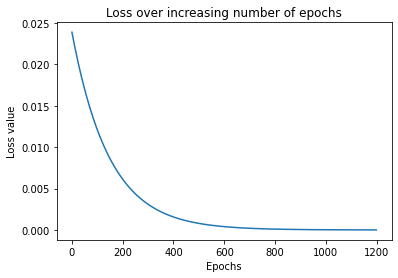

In [228]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(losses)
plt.title('Loss over increasing number of epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss value')

### Show weight W values

In [126]:
# output weights
W

[array([[ 0.01476338, -0.5907701 , -0.2753466 ],
        [ 0.3993606 , -0.5291701 ,  0.18655287]], dtype=float32),
 array([ 0.00606338,  0.5519299 , -0.06584736], dtype=float32),
 array([[ 0.35041773],
        [-0.05358773],
        [ 0.03979613]], dtype=float32),
 array([-0.21971549], dtype=float32)]

## Make prediction

Now we just forward pass the input with set of weight  W updated after training process then get the output, which is prediction of our network.

In [229]:
pre_hid = np.dot(x, W[0]) + W[1]
hid = sigmoid(pre_hid)
predout = np.dot(hid, W[2]) + W[3]
predout

array([[-0.00262035]])

**Prediction of this network is -0.00262035, which is very close to 0 (our target output)**

---

---



# Understanding the impact of the learning rate

In order to understand how learning rate impacts the training of a model, let's consider a very simple case, where we try to fit the following equation (note that the following equation is different from the toy dataset that we have been working on so far):

` y = 3 * x`

Note that y is the output and x is the input. With a set of input and expected output values, we will try and fit the equation with varying learning rates to understand the impact of the learning rate.

## Specify the input and output datasets

In [134]:
X = [[1], [2], [3], [4]]
Y = [[3], [6], [9], [12]]

## Define the `Feed_Forward` function

we will modify the network in such a way that we do not have a hidden layer and the architecture is as follows:

`y = w * x + b`

In [135]:
from copy import deepcopy
import numpy as np

def Feed_Forward(inputs, outputs, weights):
    pred_out = np.dot(inputs, weights[0]) + weights[1]
    mean_square_error = np.mean(np.square(pred_out - outputs))
    return mean_square_error

## Define the `Update_Weights` function

In [136]:
def Update_Weights(inputs, outputs, weights, lr):
    original_weights = deepcopy(weights)
    org_loss = Feed_Forward(inputs, outputs, original_weights)
    updated_weights = deepcopy(weights)
    for i, layer in enumerate(original_weights):
        for index, weight in np.ndenumerate(layer):
            temp_weights = deepcopy(weights)
            temp_weights[i][index] += 0.0001
            _loss_plus = Feed_Forward(inputs, outputs, temp_weights)
            grad = (_loss_plus - org_loss) / (0.0001)
            updated_weights[i][index] -= grad*lr 
    
    return updated_weights

## Initialize weight and bias values to a random value 

Note that the weight and bias values are randomly initialized to values of 0. Further, the shape of the input weight value is 1 x 1, as the shape of each data point in the input is 1 x 1 and the shape of the bias value is  1 x 1 (as there is only one node in the output and each output has one value).

In [150]:
Wnew = [np.array([[0]], dtype=np.float32), 
     np.array([[0]], dtype=np.float32)]

## Leverage the `Update_Weights` function

lr = 0.01, loop through 1000 iterations, and check how the weight value (Wnew) varies over increasing epochs:

In [153]:
weight_value = []

for epx in range(1000):
    Wnew = Update_Weights(X, Y, Wnew, 0.01)
    weight_value.append(Wnew[0][0][0])

## Plot the value of weight parameter at the end of each epoch

Text(0, 0.5, 'Weight value')

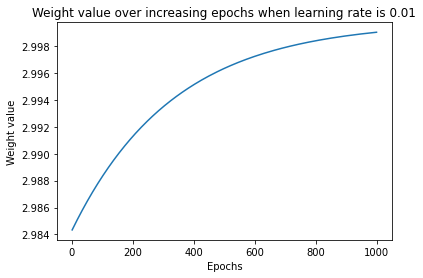

In [154]:
import matplotlib.pyplot as plt
%matplotlib inline
epochs = range(1, 1001)
plt.plot(epochs, weight_value)
plt.title('Weight value over increasing epochs when learning rate is 0.01')
plt.xlabel('Epochs')
plt.ylabel('Weight value')

## Compare weights value updating in each learning rate value

In [155]:
Wnew001 = [np.array([[0]], dtype=np.float32), 
     np.array([[0]], dtype=np.float32)]

Wnew01 = [np.array([[0]], dtype=np.float32), 
     np.array([[0]], dtype=np.float32)]

Wnew1 = [np.array([[0]], dtype=np.float32), 
     np.array([[0]], dtype=np.float32)]

In [156]:
weight_value_lr001 = []
weight_value_lr01 = []
weight_value_lr1 = []

for epx in range(1000):
    Wnew001 = Update_Weights(X, Y, Wnew001, 0.01)
    weight_value_lr001.append(Wnew001[0][0][0])

for epx in range(1000):
    Wnew01 = Update_Weights(X, Y, Wnew01, 0.1)
    weight_value_lr01.append(Wnew01[0][0][0])

for epx in range(1000):
    Wnew1 = Update_Weights(X, Y, Wnew1, 1)
    weight_value_lr1.append(Wnew1[0][0][0])

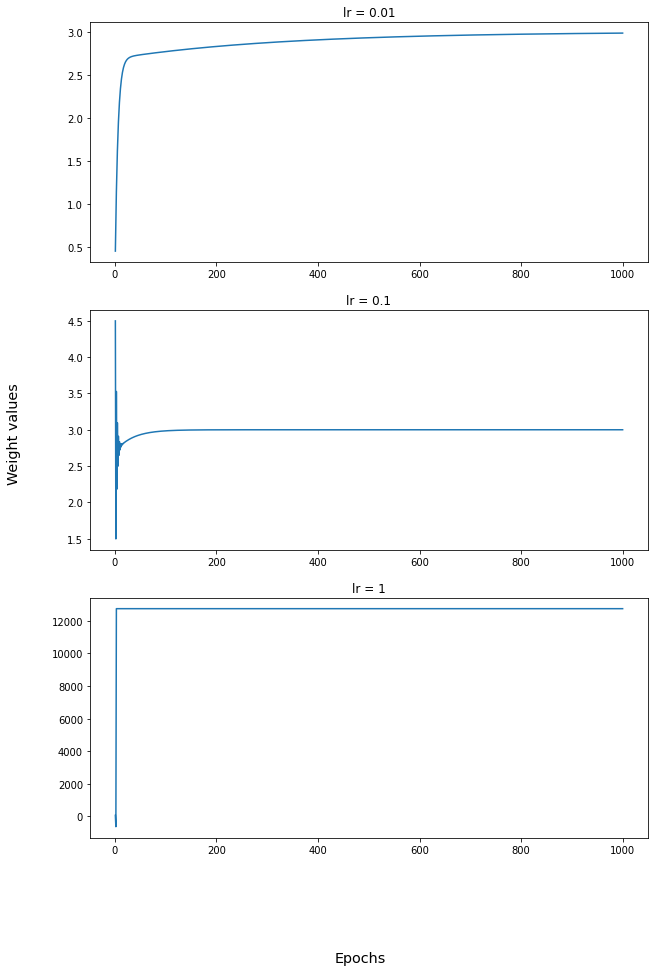

In [195]:
import matplotlib.pyplot as plt
%matplotlib inline
epochs = range(1, 1001)
fig, axs = plt.subplots(3)
fig.set_size_inches(10, 15)
fig.text(0.5, 0.01, 'Epochs', ha='center', fontSize='x-large')
fig.text(0.01, 0.5, 'Weight values', va='center', rotation='vertical', fontSize='x-large')

axs[0].plot(epochs, weight_value_lr001)
axs[0].set_title('lr = 0.01')

axs[1].plot(epochs, weight_value_lr01)
axs[1].set_title('lr = 0.1')

axs[2].plot(epochs, weight_value_lr1)
axs[2].set_title('lr = 1')

# for ax in axs.flat:
#     ax.set(xlabel='Epochs', ylabel='Weights')

plt.show()

 - **lr = 0.01**: the weight value moved slowly (over a higher number of epochs) towards the optimal value.

 - **lr = 0.1**: the weight value oscillated initially and then quickly saturated (in a few epochs) to the optimal value.

 - **lr = 1**: the weight value spiked to a very high value and was not able to reach the optimal value.

The reason the weight value did not spike by a large amount when the learning rate was low is that we restricted the weight update by an amount that was equal to the gradient * learning rate, essentially resulting in a small amount of weight update when the learning rate was small.

However, when the learning rate was high, weight update was high, after which the change in loss (when the weight was updated by a small value) was so small that the weight could not achieve the optimal value.

## Print weight values to see how they vary over increasing epochs

- Weight value at the start of each epoch
- Loss prior to weight update
- Loss when the weight is updated by a small amount
- Gradient value

Implement new update weight function `Update_Weights_modified`

In [236]:
def Update_Weights_modified(inputs, outputs, weights, lr):
    original_weights = deepcopy(weights)
    org_loss = Feed_Forward(inputs, outputs, original_weights)
    updated_weights = deepcopy(weights)
    for i, layer in enumerate(original_weights):
        for index, weight in np.ndenumerate(layer):
            temp_weights = deepcopy(weights)
            temp_weights[i][index] += 0.0001
            _loss_plus = Feed_Forward(inputs, outputs, temp_weights)
            grad = (_loss_plus - org_loss) / (0.0001)
            updated_weights[i][index] -= grad*lr 
            if (i % 2 == 0):
                print('weight value: ', np.round(original_weights[i][index], 2), 
                      ', original loss: ', np.round(org_loss, 2), 
                      ', loss_plus: ', np.round(_loss_plus, 2), 
                      ', gradient: ', np.round(grad, 2), 
                      ', updated weights: ', np.round(updated_weights[i][index], 2))
    return updated_weights

### Learning rate of 0.01

weight value:  0.0 , original loss:  67.5 , loss_plus:  67.5 , gradient:  -45.0 , updated weights:  0.45
weight value:  0.45 , original loss:  46.88 , loss_plus:  46.88 , gradient:  -37.49 , updated weights:  0.82
weight value:  0.82 , original loss:  32.57 , loss_plus:  32.57 , gradient:  -31.26 , updated weights:  1.14
weight value:  1.14 , original loss:  22.64 , loss_plus:  22.64 , gradient:  -26.05 , updated weights:  1.4
weight value:  1.4 , original loss:  15.75 , loss_plus:  15.75 , gradient:  -21.72 , updated weights:  1.62
weight value:  1.62 , original loss:  10.97 , loss_plus:  10.97 , gradient:  -18.1 , updated weights:  1.8
weight value:  1.8 , original loss:  7.65 , loss_plus:  7.65 , gradient:  -15.09 , updated weights:  1.95
weight value:  1.95 , original loss:  5.35 , loss_plus:  5.35 , gradient:  -12.59 , updated weights:  2.07
weight value:  2.07 , original loss:  3.75 , loss_plus:  3.75 , gradient:  -10.49 , updated weights:  2.18
weight value:  2.18 , original los

Text(0, 0.5, 'Weight value')

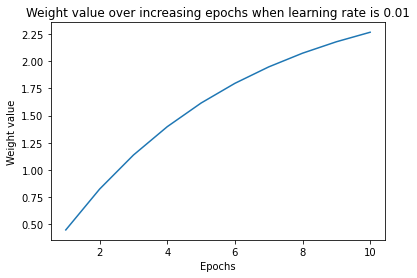

In [237]:
X = [[1], [2], [3], [4]]
Y = [[3], [6], [9], [12]]

W_new = [np.array([[0]], dtype=np.float32), 
     np.array([[0]], dtype=np.float32)]

weight_value_new = []
for exp in range(10):
    W_new = Update_Weights_modified(X, Y, W_new, 0.01)
    weight_value_new.append(W_new[0][0][0])

print(W_new)

import matplotlib.pyplot as plt
%matplotlib inline
epochs = range(1, 11)
plt.plot(epochs,weight_value_new)
plt.title('Weight value over increasing epochs when learning rate is 0.01')
plt.xlabel('Epochs')
plt.ylabel('Weight value')

*Note that, when the learning rate was 0.01, the loss value decreased slowly, and also the weight value updated slowly towards the optimal value. Let's now understand how the preceding varies when the learning rate is 0.1.*

### Learning rate of 0.1

weight value:  0.0 , original loss:  67.5 , loss_plus:  67.5 , gradient:  -45.0 , updated weights:  4.5
weight value:  4.5 , original loss:  30.37 , loss_plus:  30.38 , gradient:  30.04 , updated weights:  1.5
weight value:  1.5 , original loss:  13.79 , loss_plus:  13.78 , gradient:  -20.31 , updated weights:  3.53
weight value:  3.53 , original loss:  6.25 , loss_plus:  6.26 , gradient:  13.46 , updated weights:  2.18
weight value:  2.18 , original loss:  2.85 , loss_plus:  2.85 , gradient:  -9.14 , updated weights:  3.1
weight value:  3.1 , original loss:  1.33 , loss_plus:  1.33 , gradient:  5.97 , updated weights:  2.5
weight value:  2.5 , original loss:  0.65 , loss_plus:  0.65 , gradient:  -4.12 , updated weights:  2.91
weight value:  2.91 , original loss:  0.34 , loss_plus:  0.34 , gradient:  2.63 , updated weights:  2.65
weight value:  2.65 , original loss:  0.2 , loss_plus:  0.2 , gradient:  -1.88 , updated weights:  2.84
weight value:  2.84 , original loss:  0.13 , loss_plus

Text(0, 0.5, 'Weight value')

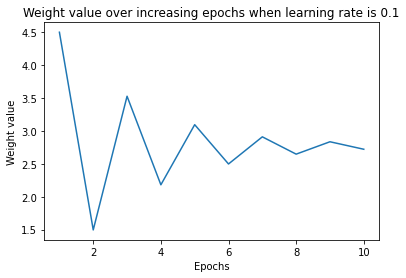

In [239]:
X = [[1], [2], [3], [4]]
Y = [[3], [6], [9], [12]]

W_new = [np.array([[0]], dtype=np.float32), 
     np.array([[0]], dtype=np.float32)]

weight_value_new = []
for exp in range(10):
    W_new = Update_Weights_modified(X, Y, W_new, 0.1)
    weight_value_new.append(W_new[0][0][0])

print(W_new)

import matplotlib.pyplot as plt
%matplotlib inline
epochs = range(1, 11)
plt.plot(epochs,weight_value_new)
plt.title('Weight value over increasing epochs when learning rate is 0.1')
plt.xlabel('Epochs')
plt.ylabel('Weight value')

*When the learning rate was 0.01, the weight updated much slower when compared to a learning rate of 0.1 (from 0 to 0.45 in the first epoch when the learning rate is 0.01, to 4.5 when the learning rate is 0.1). The reason for the slower update is the lower learning rate as the weight is updated by the gradient times the learning rate.*

In addition to the weight update magnitude, we should note the direction of the weight update:

*The gradient is negative when the weight value is smaller than the optimal value while it is positive when the weight value is larger than the optimal value. This phenomenon helps in updating weight values in the right direction.*

### Learning rate of 1

weight value:  0.0 , original loss:  67.5 , loss_plus:  67.5 , gradient:  -45.0 , updated weights:  45.0
weight value:  45.0 , original loss:  16604.45 , loss_plus:  16604.52 , gradient:  699.22 , updated weights:  -654.22
weight value:  -654.22 , original loss:  4030779.1 , loss_plus:  4030777.76 , gradient:  -13409.38 , updated weights:  12755.16
weight value:  12755.16 , original loss:  1473935827.59 , loss_plus:  1473935827.59 , gradient:  0.0 , updated weights:  12755.16
weight value:  12755.16 , original loss:  1473935827.59 , loss_plus:  1473935827.59 , gradient:  0.0 , updated weights:  12755.16
weight value:  12755.16 , original loss:  1473935827.59 , loss_plus:  1473935827.59 , gradient:  0.0 , updated weights:  12755.16
weight value:  12755.16 , original loss:  1473935827.59 , loss_plus:  1473935827.59 , gradient:  0.0 , updated weights:  12755.16
weight value:  12755.16 , original loss:  1473935827.59 , loss_plus:  1473935827.59 , gradient:  0.0 , updated weights:  12755.16

Text(0, 0.5, 'Weight value')

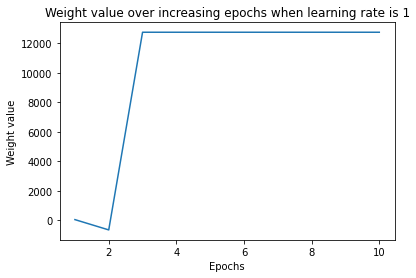

In [240]:
X = [[1], [2], [3], [4]]
Y = [[3], [6], [9], [12]]

W_new = [np.array([[0]], dtype=np.float32), 
     np.array([[0]], dtype=np.float32)]

weight_value_new = []
for exp in range(10):
    W_new = Update_Weights_modified(X, Y, W_new, 1)
    weight_value_new.append(W_new[0][0][0])

print(W_new)

import matplotlib.pyplot as plt
%matplotlib inline
epochs = range(1, 11)
plt.plot(epochs,weight_value_new)
plt.title('Weight value over increasing epochs when learning rate is 1')
plt.xlabel('Epochs')
plt.ylabel('Weight value')

The weight has deviated to a very high value (as at the end of the first epoch, the weight value is 45, which further deviated to a very large value in later epochs).

In addition to that, the weight value moved to a very large amount, so that a small change in the weight value hardly results in a change in the gradient, and hence the weight got stuck at that high value.

*    *In general, it is better to have a low learning rate. This way, the model is able to learn slowly but will adjust the weights towards an optimal value. Typical learning rate parameter values range between 0.0001 and 0.01.*